## Personal Weather Station Evaluation

In [1]:
#### Imports

import sys,os,warnings,math,glob
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from datetime import datetime  
from datetime import timedelta 
warnings.filterwarnings('ignore')


In [2]:
#### Declarations

stations = ["IWATERLO57", "IWATERLO55", "IKITCHEN16", "IKITCHEN15", "IWOOLWIC7", "IONTARIO1036", "ICAMBRID183"]
my_station = "IWATERLO57"
study_year = 2019
colors = ["black", "blue", "orange", "purple", "cyan", "magenta", "red"]


In [3]:
def rmse(predictions, targets):
    return np.sqrt(np.nanmean((predictions - targets) ** 2))

def std(predictions, targets):
    return np.std(predictions - targets)

def give_summary(dat1, dat2):
    corr_val = pd.DataFrame({'STATION': dat1, 'SNODAS': dat2}).corr().STATION[1]
    rmse_val = rmse(np.array(dat2), np.array(dat1))
    bias_val = np.nanmean(dat2) - np.nanmean(dat1)
    std_val = std(np.array(dat2), np.array(dat1))
    return corr_val, rmse_val, bias_val, std_val

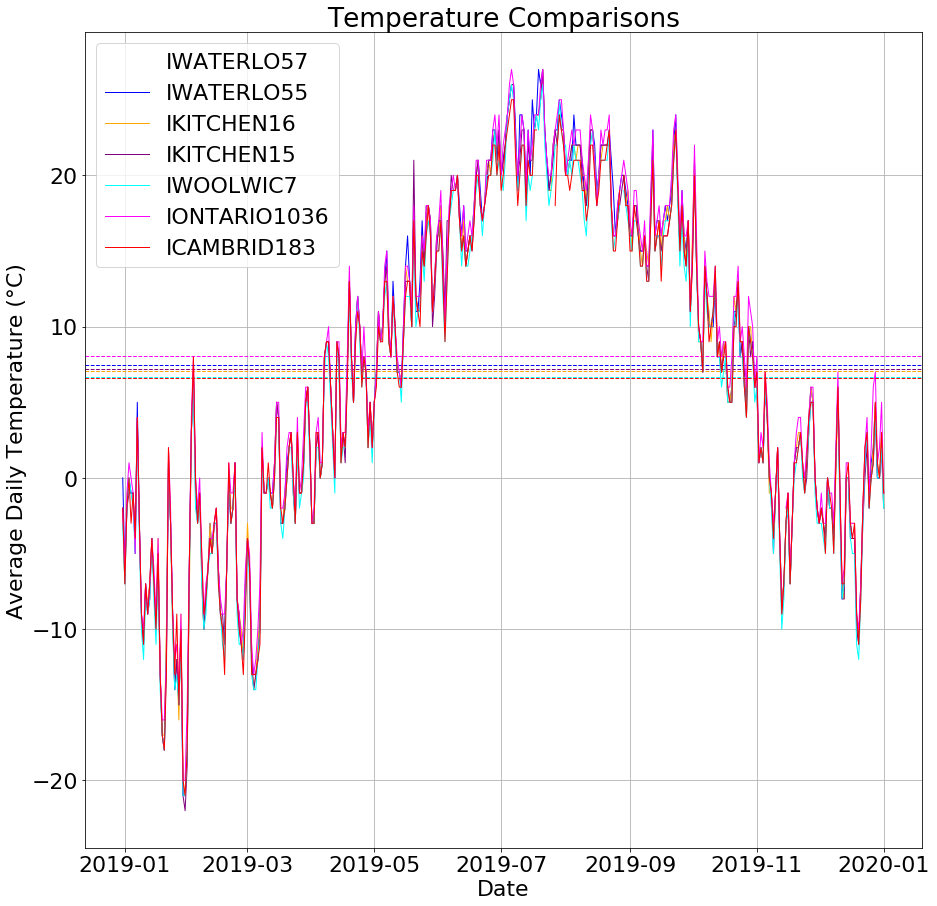

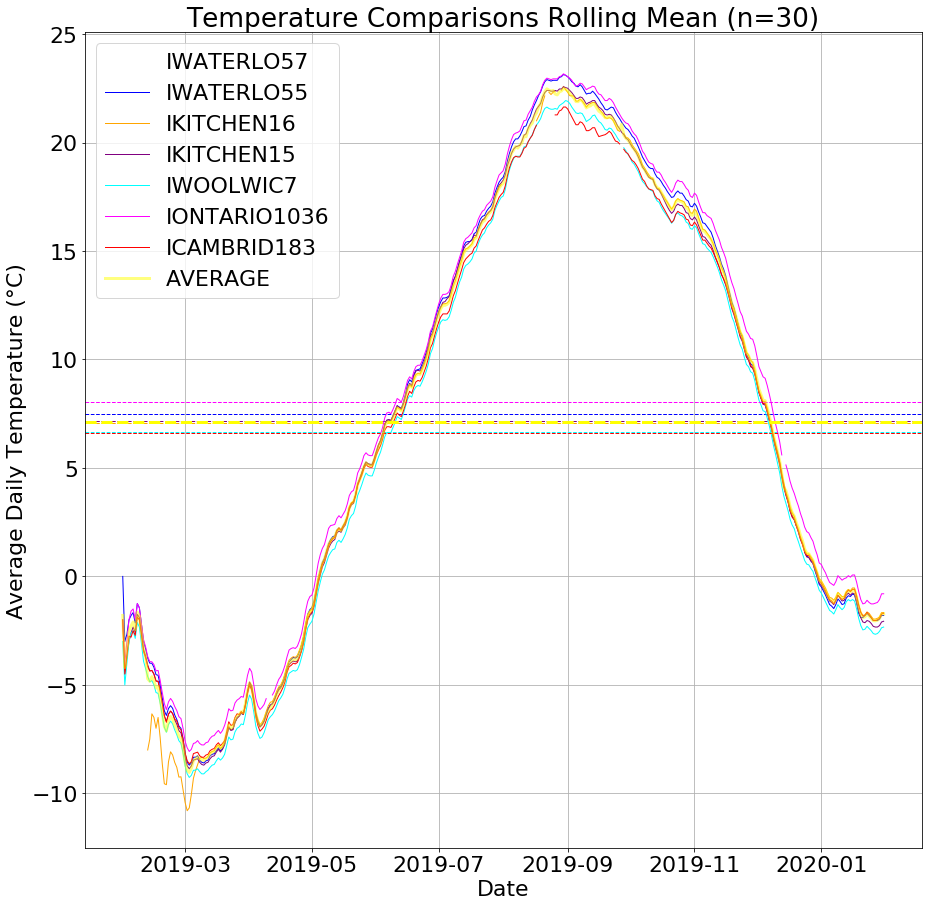

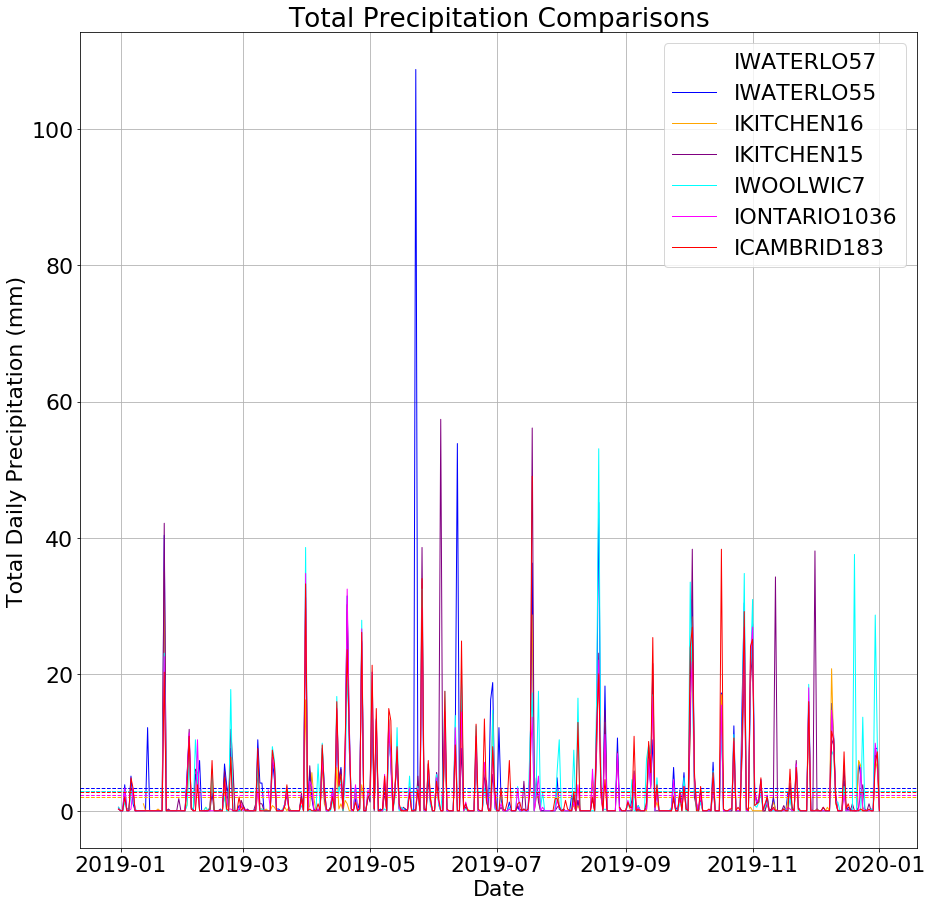

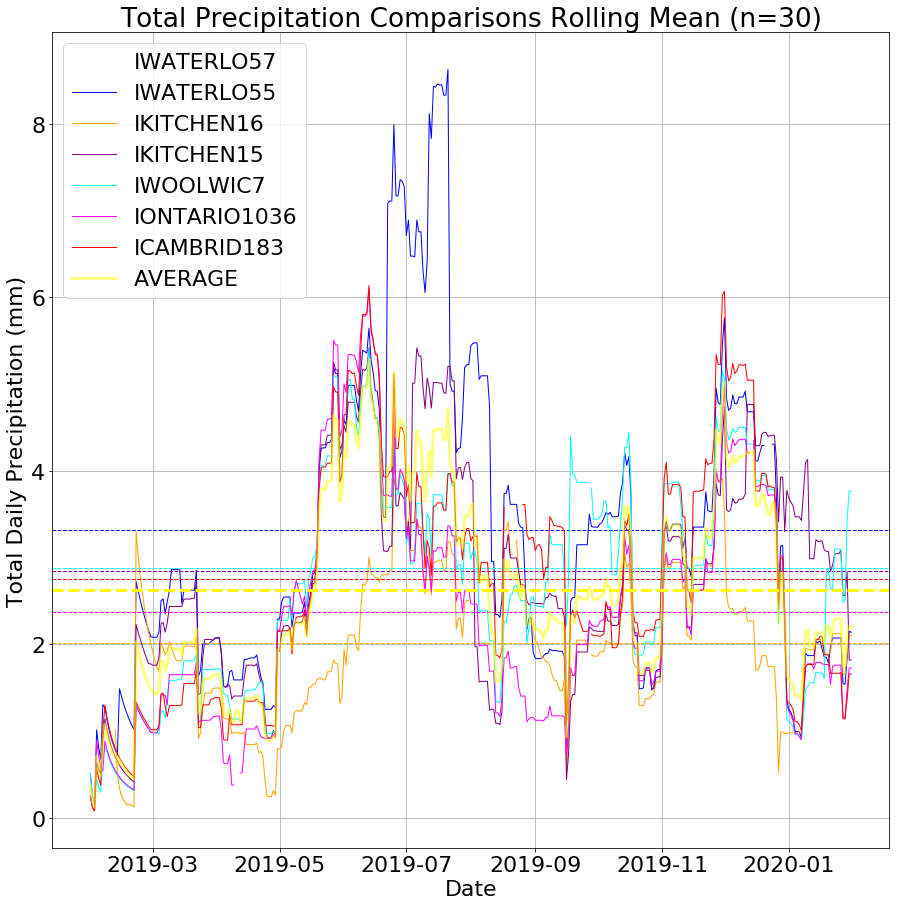

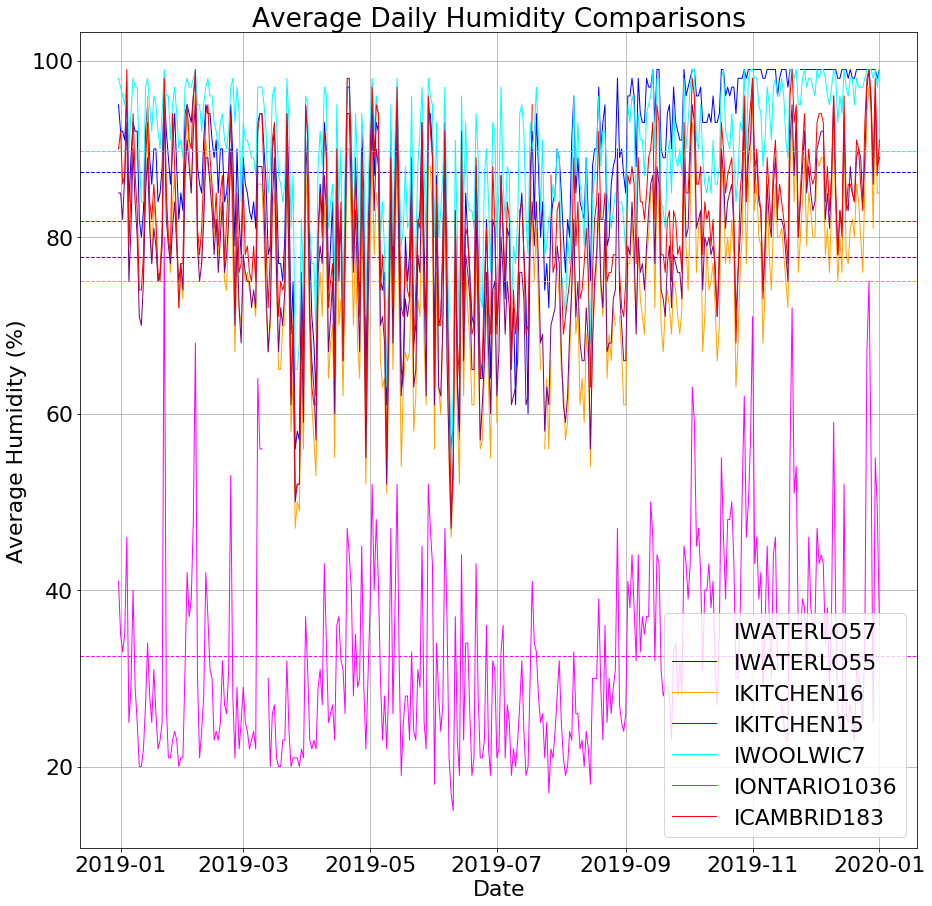

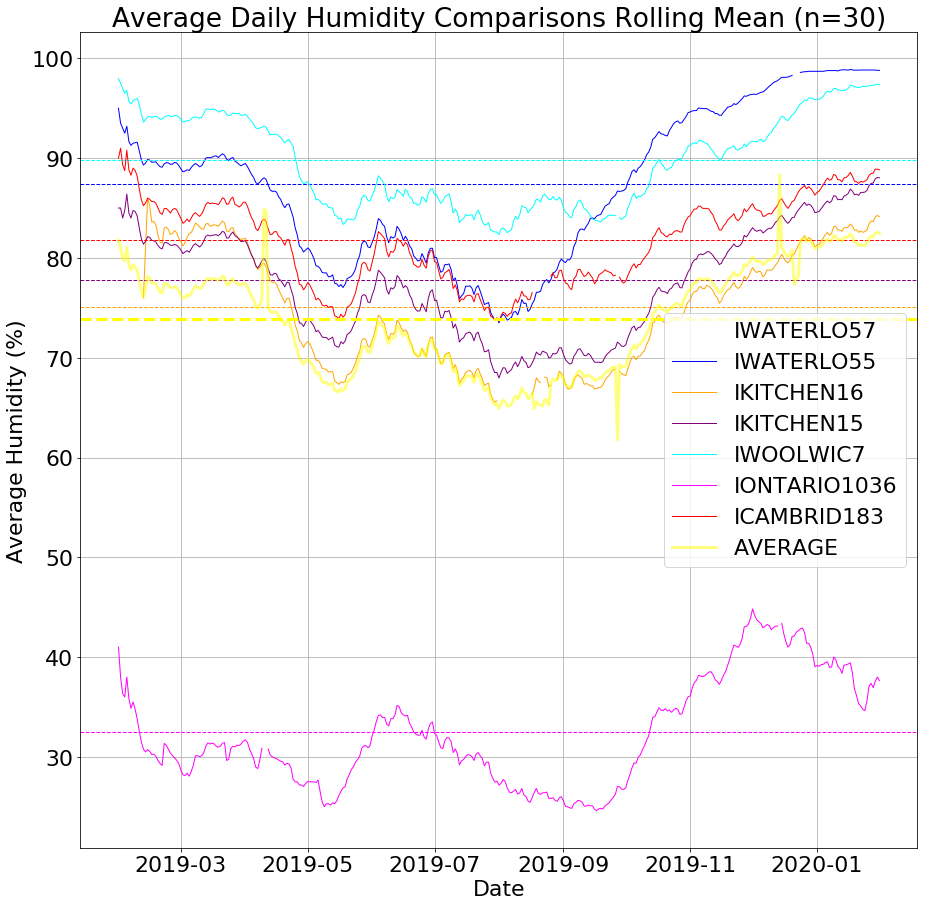

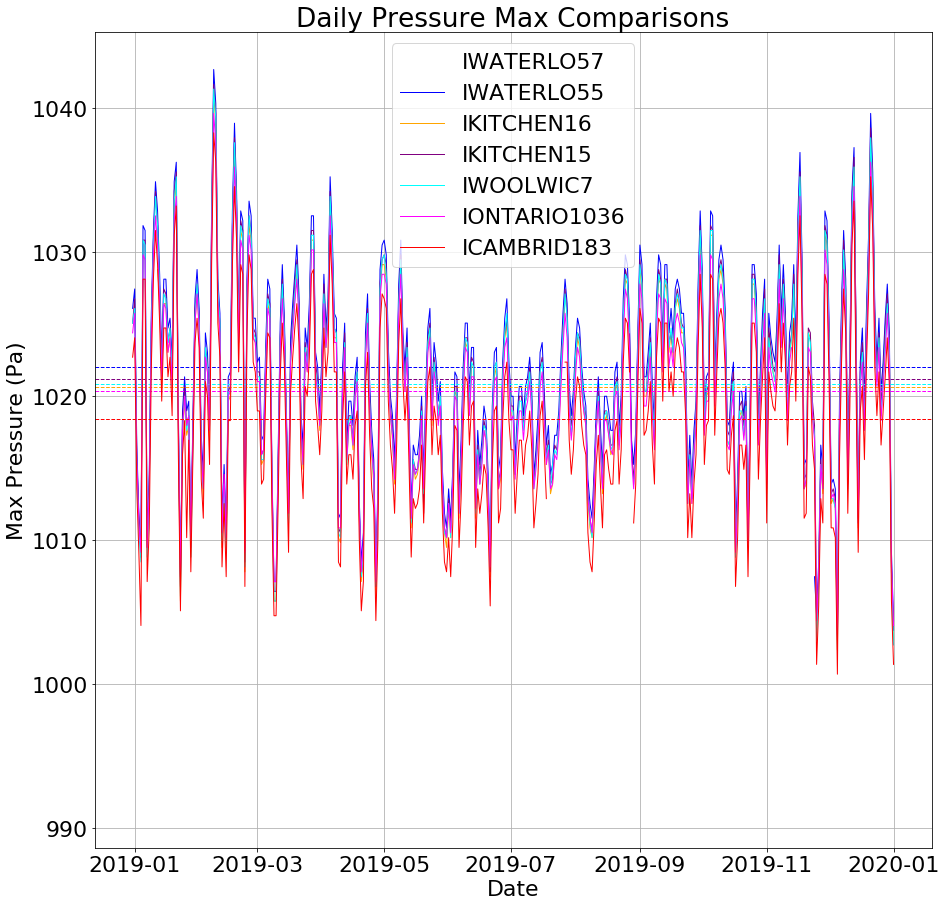

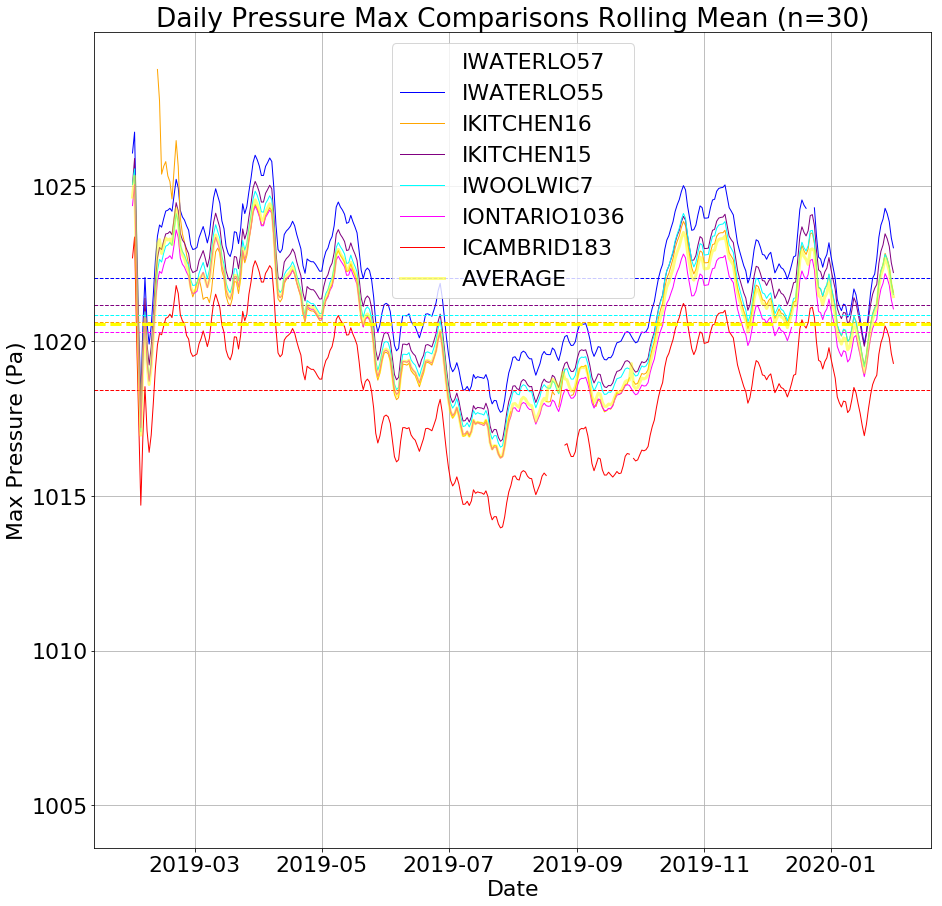

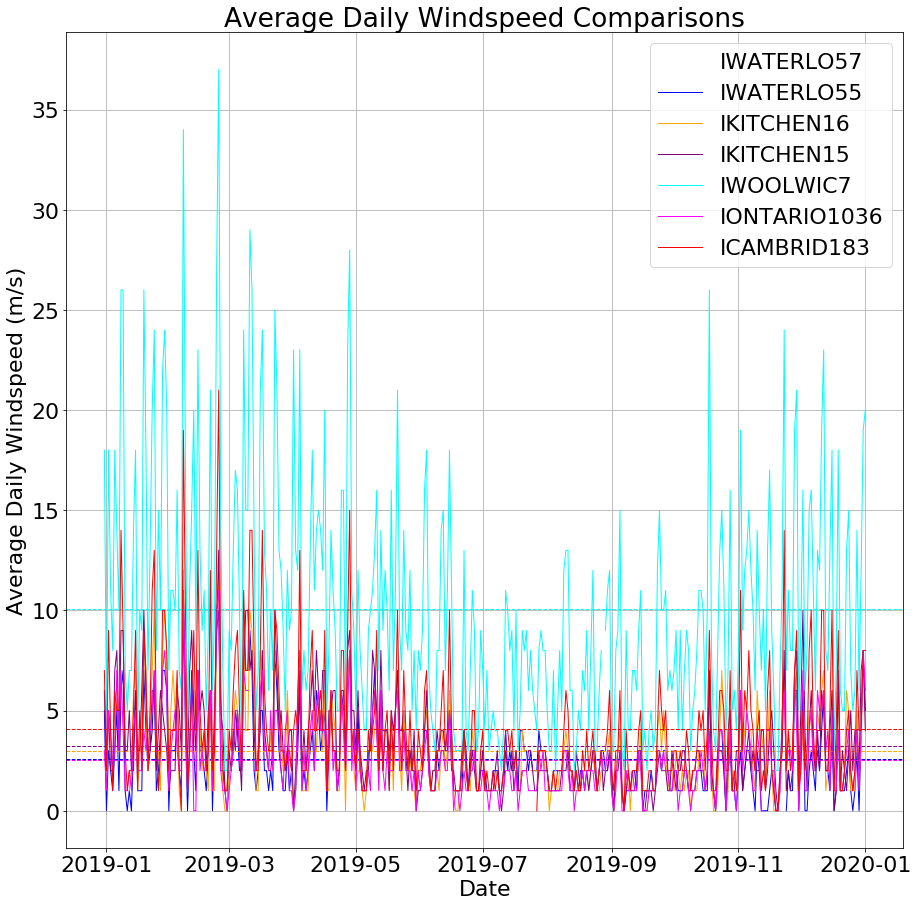

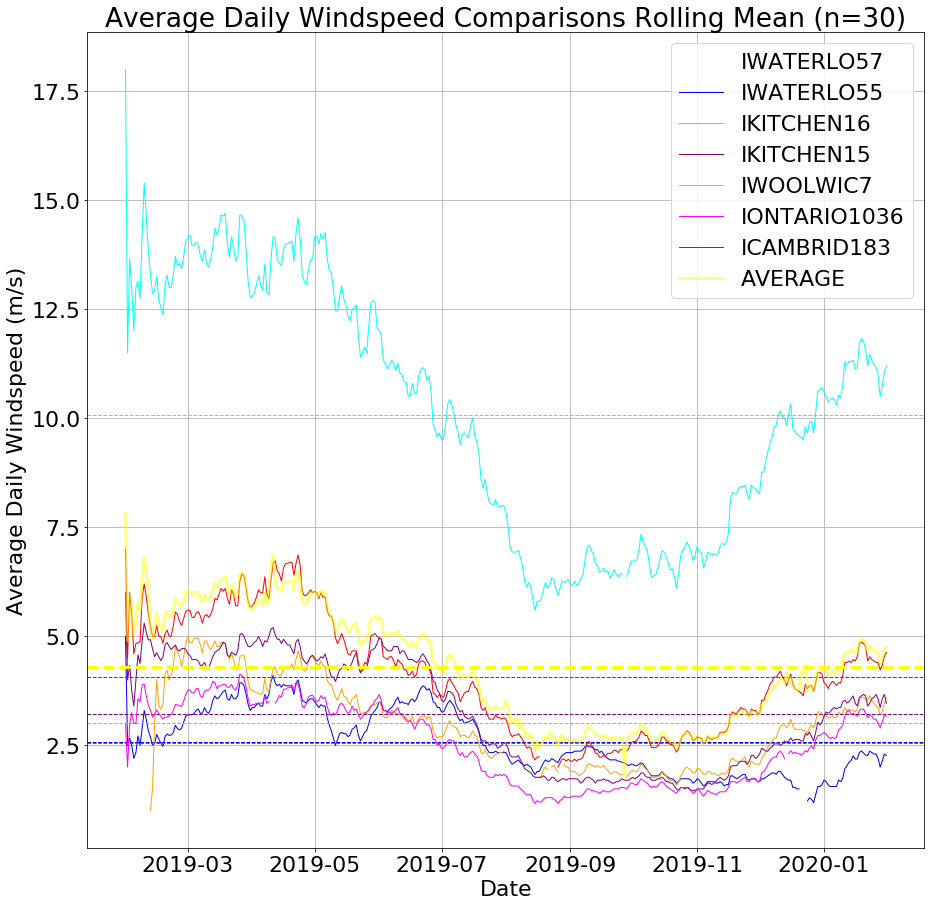

In [4]:
#### Plotting Timeseries

# plotClimaticVariable: This function makes a plot of any climatic variable from our station data
def plotClimaticVariable(metric, fig_name, fig_title, fig_xaxis, fig_yaxis, save, moving_avg):
    master_df = pd.DataFrame()
    base_case = True
    
    # Helper function
    def moving_average(a, n=30):
        ret = np.cumsum(a.filled(0))
        ret[n:] = ret[n:] - ret[:-n]
        counts = np.cumsum(~a.mask)
        counts[n:] = counts[n:] - counts[:-n]
        ret[~a.mask] /= counts[~a.mask]
        ret[a.mask] = np.nan
        return ret
    
    # Read in station data
    for station in stations:
        df = pd.DataFrame({station: pd.read_csv(station + "_data.csv")[metric].values})
        if base_case:
            master_df = df
            base_case = False
            continue
        master_df = master_df.join(df)
    
    data = master_df[my_station]
    start_day = 1
    if moving_avg:
        data = moving_average(np.ma.masked_array(master_df[my_station].to_numpy(dtype=np.float64), np.isnan(master_df[my_station].to_numpy(dtype=np.float64))))
        start_day = 31
    
    # Set up x axis (dates)
    day_indices = np.arange(data.shape[0])
    day_of_year = list(map(lambda x: datetime(study_year, 1, start_day) + timedelta(int(x) - 1), day_indices))
    moving_avg_df = pd.DataFrame()
    
    # Plot results
    plt.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.rcParams.update({'font.size': 22})
    plt.grid()
    ax.set_title(fig_title)
    ax.set_xlabel(fig_xaxis)
    ax.set_ylabel(fig_yaxis)
    base_case = True
    for i, station in enumerate(stations):
        linewidth = 1
        if station == my_station:
            linewidth = 0
        data = master_df[station]
        if moving_avg:
            data = moving_average(np.ma.masked_array(master_df[station].to_numpy(dtype=np.float64), np.isnan(master_df[station].to_numpy(dtype=np.float64))))
            df = pd.DataFrame({station: pd.read_csv(station + "_data.csv")[metric].values})
        if base_case:
            moving_avg_df = pd.DataFrame({station: data})
            base_case = False
        else:
            moving_avg_df = moving_avg_df.join(pd.DataFrame({station: data}))
        ax.plot(day_of_year, data, label=station, color=colors[i], linewidth=linewidth)
        ax.axhline(np.nanmean(master_df[station]), linestyle="--", color=colors[i], linewidth=linewidth)
        
    # Plot Mean
    if moving_avg:
        moving_avg_df = moving_avg_df.drop(columns=['IWATERLO57'])
        data = moving_avg_df.mean(axis=1)
        ax.plot(day_of_year, data, label="AVERAGE", color="Yellow", linewidth=3, alpha=0.5)
        ax.axhline(np.nanmean(data), linestyle="--", color="Yellow", linewidth=3)
        
    ax.legend()
    if save:
        fig.savefig(figname, transparent=True)

# Run plots (daily and 30 day running mean)
plotClimaticVariable('metric.tempAvg', 'temp_comparisons.png', 'Temperature Comparisons', "Date", "Average Daily Temperature (°C)", False, False)
plotClimaticVariable('metric.tempAvg', 'temp_comparisons.png', 'Temperature Comparisons Rolling Mean (n=30)', "Date", "Average Daily Temperature (°C)", False, True)
plotClimaticVariable('metric.precipTotal', 'precip_comparisons.png', 'Total Precipitation Comparisons', "Date", "Total Daily Precipitation (mm)", False, False)
plotClimaticVariable('metric.precipTotal', 'precip_comparisons.png', 'Total Precipitation Comparisons Rolling Mean (n=30)', "Date", "Total Daily Precipitation (mm)", False, True)
plotClimaticVariable('humidityAvg', 'humidity_comparisons.png', 'Average Daily Humidity Comparisons', "Date", "Average Humidity (%)", False, False)
plotClimaticVariable('humidityAvg', 'humidity_comparisons.png', 'Average Daily Humidity Comparisons Rolling Mean (n=30)', "Date", "Average Humidity (%)", False, True)
plotClimaticVariable('metric.pressureMax', 'pressure_comparisons.png', 'Daily Pressure Max Comparisons', "Date", "Max Pressure (Pa)", False, False)
plotClimaticVariable('metric.pressureMax', 'pressure_comparisons.png', 'Daily Pressure Max Comparisons Rolling Mean (n=30)', "Date", "Max Pressure (Pa)", False, True)
plotClimaticVariable('metric.windspeedAvg', 'wind_comparisons.png', 'Average Daily Windspeed Comparisons', "Date", "Average Daily Windspeed (m/s)", False, False)
plotClimaticVariable('metric.windspeedAvg', 'wind_comparisons.png', 'Average Daily Windspeed Comparisons Rolling Mean (n=30)', "Date", "Average Daily Windspeed (m/s)", False, True)

### SPONGE
# PRINT STATS
# LOOK AT CLIMATOLOGIES




metric.tempAvg
IWATERLO55
(0.9963924942236674, 1.1459436343846992, -0.5820133544929185, nan)
IKITCHEN16
(0.9968133924503156, 1.121634751658949, -0.9698674358953872, nan)
IKITCHEN15
(0.9964652244417639, 1.2646956317122056, -0.8637602179836517, 0.9237820774948874)
IWOOLWIC7
(0.9960570312859838, 1.6685781388548997, -1.393308616607853, nan)
IONTARIO1036
(0.9971202940177053, 0.8320502943378437, -0.018826541306104616, nan)
ICAMBRID183
(0.9950966224590866, 1.4911283268554851, -1.423347997503539, nan)

metric.precipTotal
IWATERLO55
(0.6200847069497297, 7.121453040397964, 0.6624365212444223, nan)
IKITCHEN16
(0.811248582892887, 4.1047008313586035, -0.6382021143135677, nan)
IKITCHEN15
(0.6868117997049794, 5.588692554494732, 0.18899182561307848, 5.585496088846208)
IWOOLWIC7
(0.7797948927342386, 4.511474441836534, 0.21740154256190314, nan)
IONTARIO1036
(0.8686107620970087, 3.3348943917904816, -0.2885524897445877, nan)
ICAMBRID183
(0.7933587470262785, 4.257092996649581, 0.09229240558354768, nan)

h

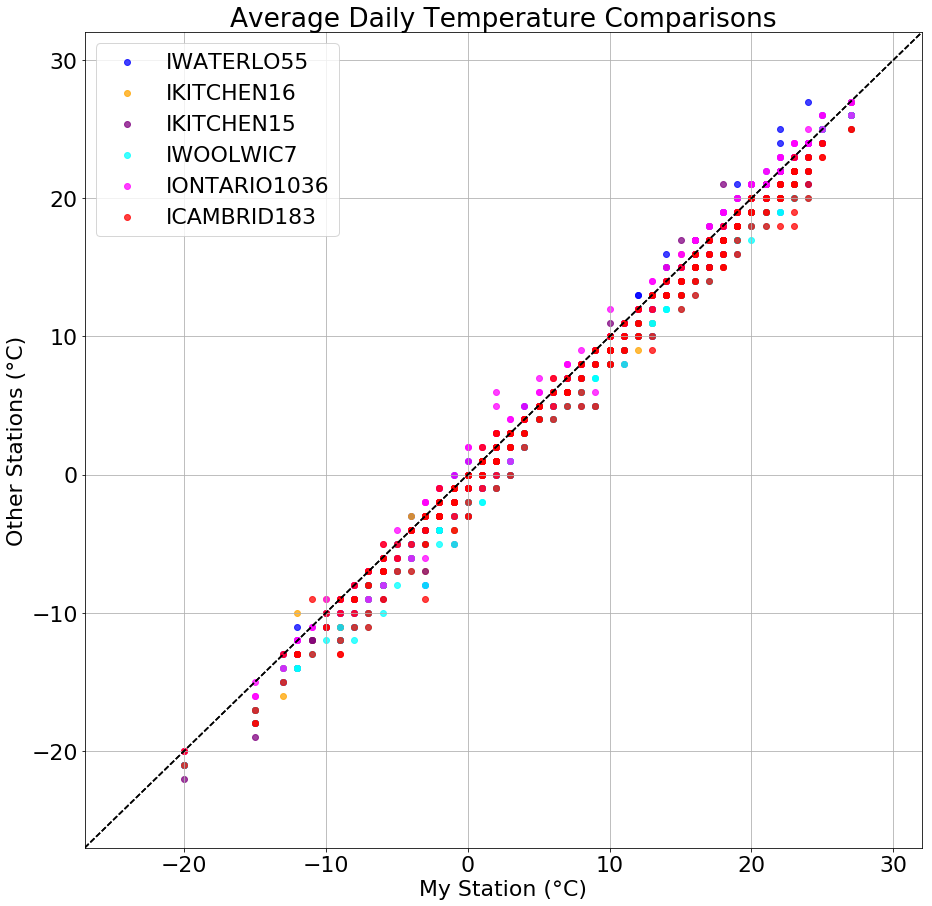

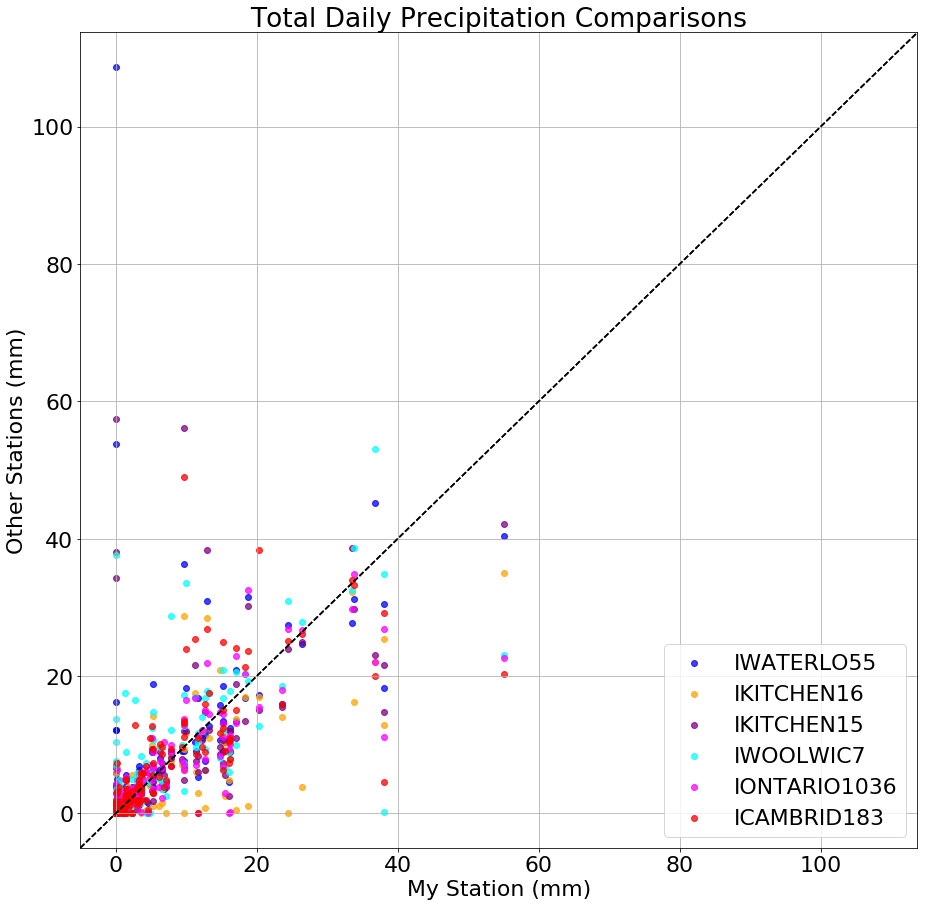

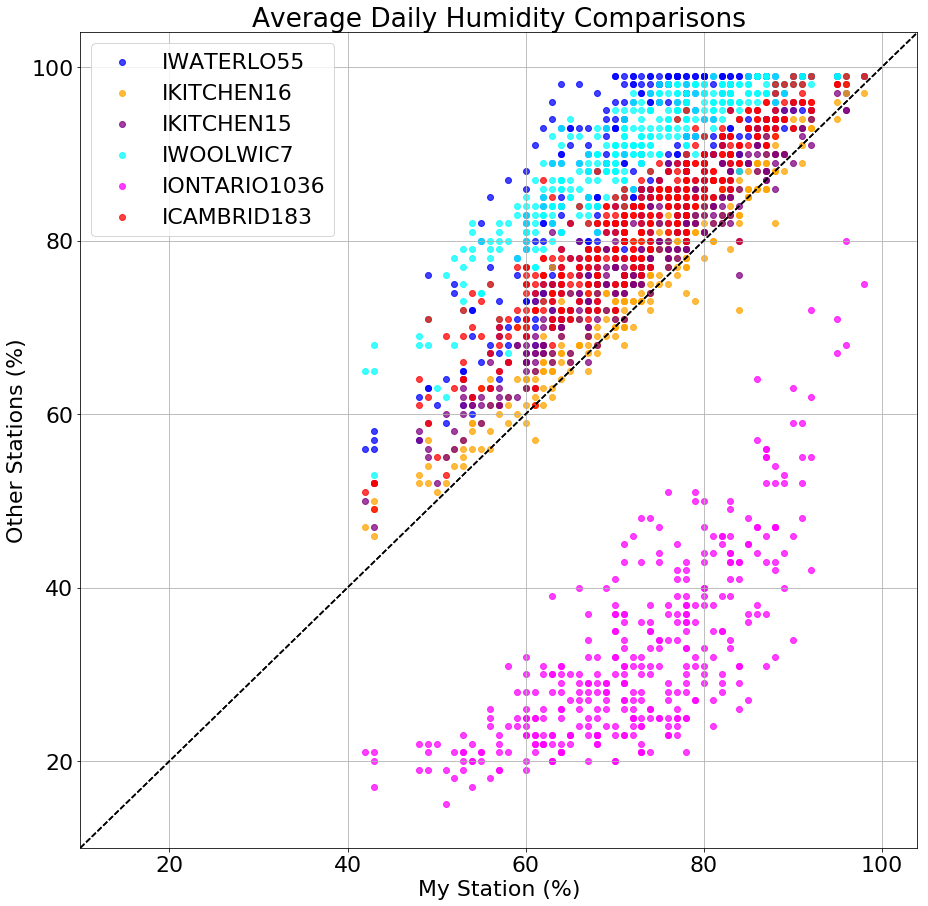

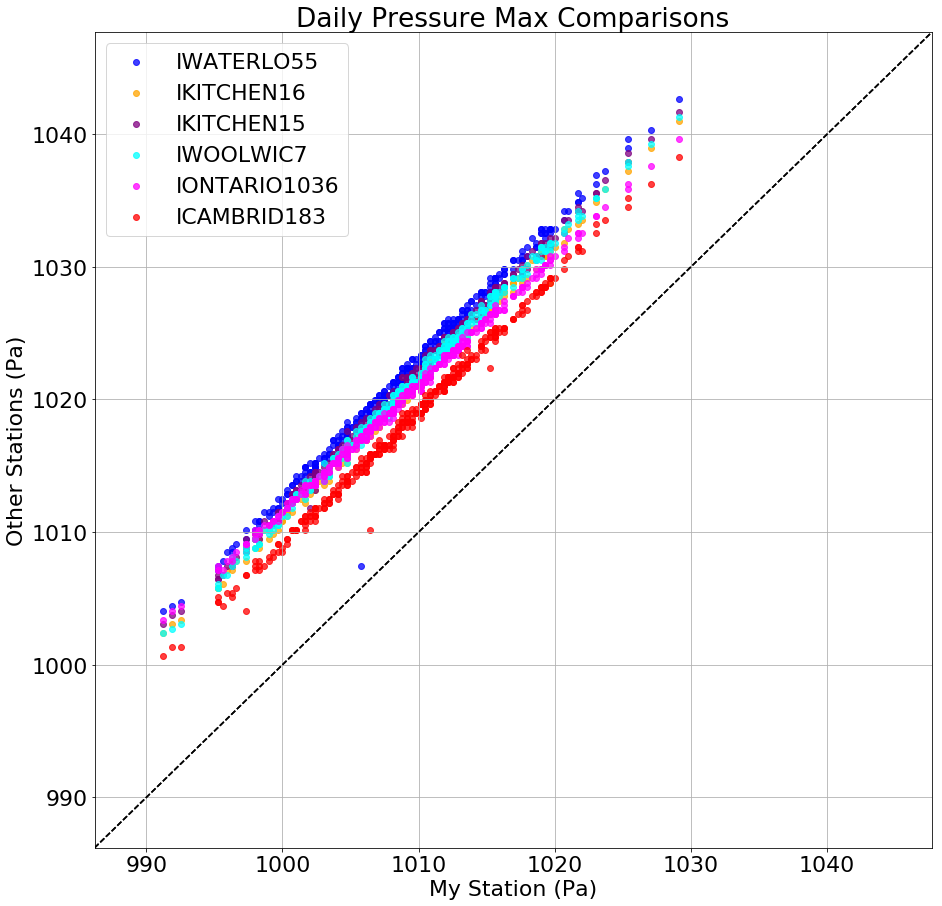

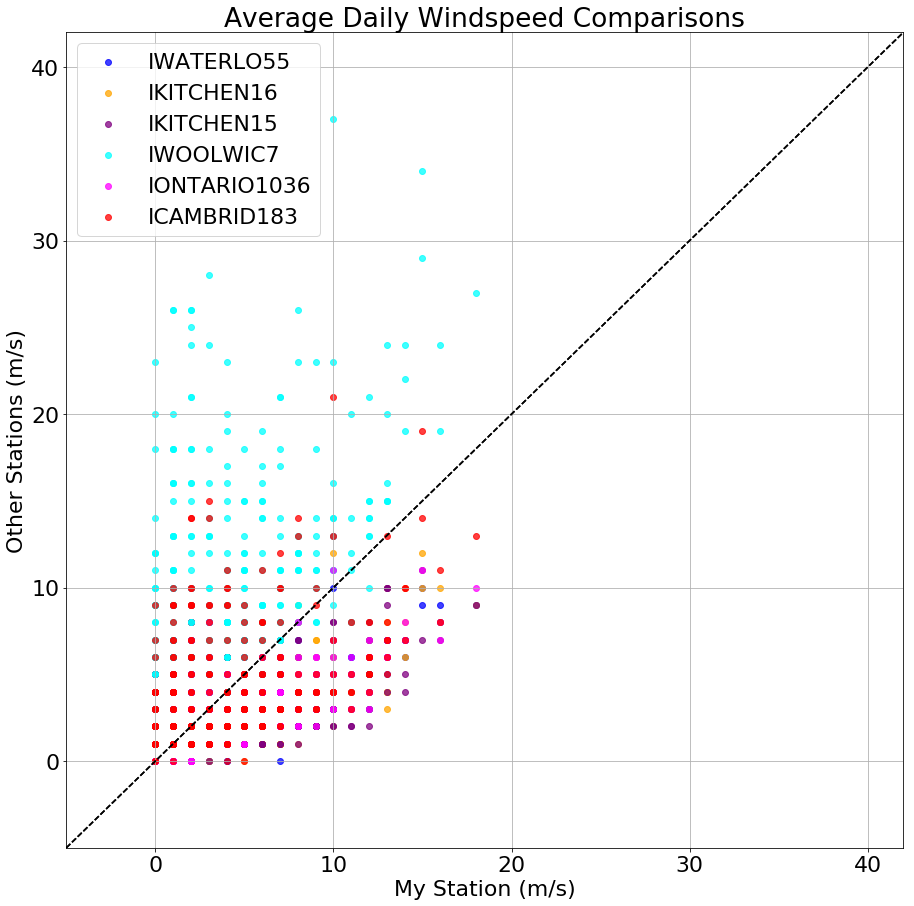

In [5]:
#### Plotting Timeseries

# plotClimaticVariable: This function makes a plot of any climatic variable from our station data
def climScatter(metric, fig_name, fig_title, fig_xaxis, fig_yaxis, save):
    master_df = pd.DataFrame()
    base_case = True
    
    # Read in station data
    for station in stations:
        df = pd.DataFrame({station: pd.read_csv(station + "_data.csv")[metric].values})
        if base_case:
            master_df = df
            base_case = False
            continue
        master_df = master_df.join(df)
            
    # Plot results
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.rcParams.update({'font.size': 22})
    plt.grid()
    ax.set_xlim((min(master_df.min()))-5, max(master_df.max())+5)
    ax.set_ylim((min(master_df.min()))-5, max(master_df.max())+5)
    ax.set_title(fig_title)
    ax.set_xlabel(fig_xaxis)
    ax.set_ylabel(fig_yaxis)
    
    print()
    print(metric)
    for i, station in enumerate(stations):
        if station == my_station:
            continue
        my_data = master_df[my_station]
        data = master_df[station]
        ax.scatter(my_data, data, label=station, color=colors[i], alpha=0.75)
        ax.plot((((min(master_df.min()))-5, max(master_df.max())+5)), (((min(master_df.min()))-5, max(master_df.max())+5)), color="black", linestyle="--", alpha=0.5)
        
        # Summary stats
        print(station)
        print(give_summary(my_data, data))
        
    ax.legend()
    if save:
        fig.savefig(figname, transparent=True)

# Run plots
climScatter('metric.tempAvg', 'temp_comparisons.png', 'Average Daily Temperature Comparisons', "My Station (°C)", "Other Stations (°C)", False)
climScatter('metric.precipTotal', 'precip_comparisons.png', 'Total Daily Precipitation Comparisons', "My Station (mm)", "Other Stations (mm)", False)
climScatter('humidityAvg', 'humidity_comparisons.png', 'Average Daily Humidity Comparisons', "My Station (%)", "Other Stations (%)", False)
climScatter('metric.pressureMax', 'pressure_comparisons.png', 'Daily Pressure Max Comparisons', "My Station (Pa)", "Other Stations (Pa)", False)
climScatter('metric.windspeedAvg', 'wind_comparisons.png', 'Average Daily Windspeed Comparisons', "My Station (m/s)", "Other Stations (m/s)", False)



Temperature Plots:


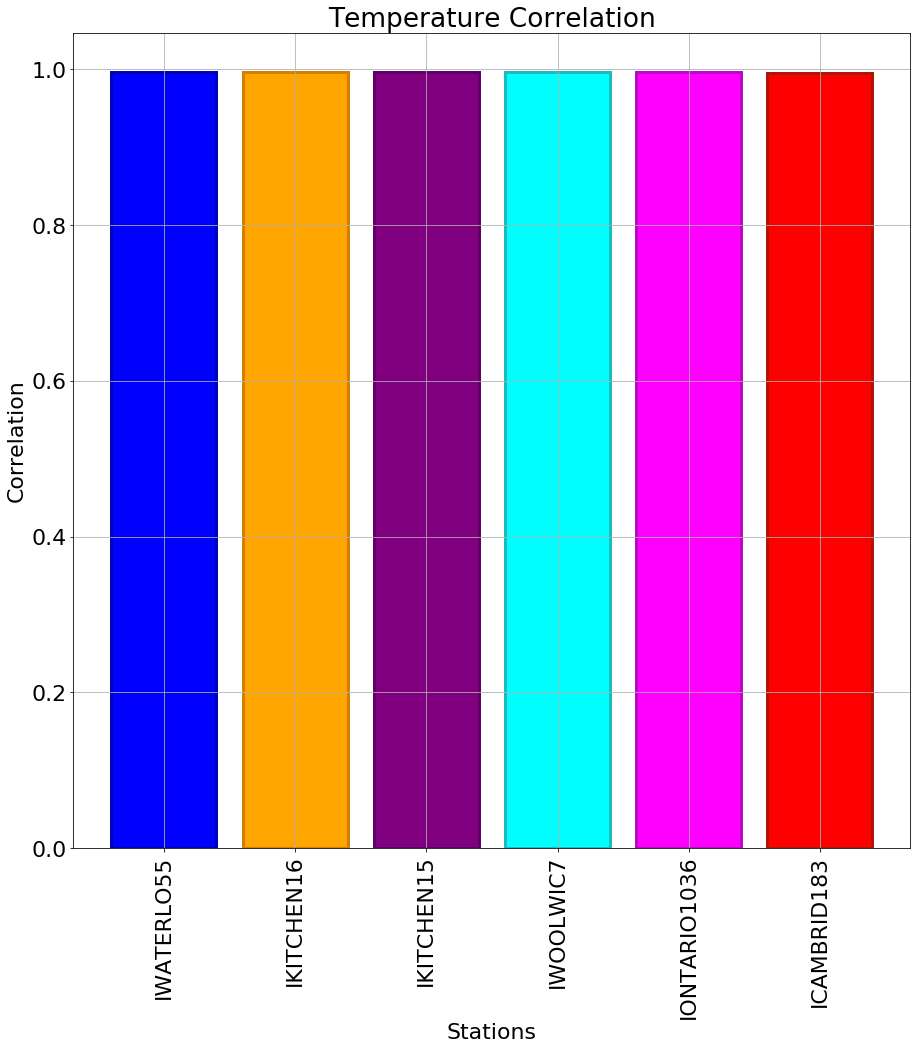

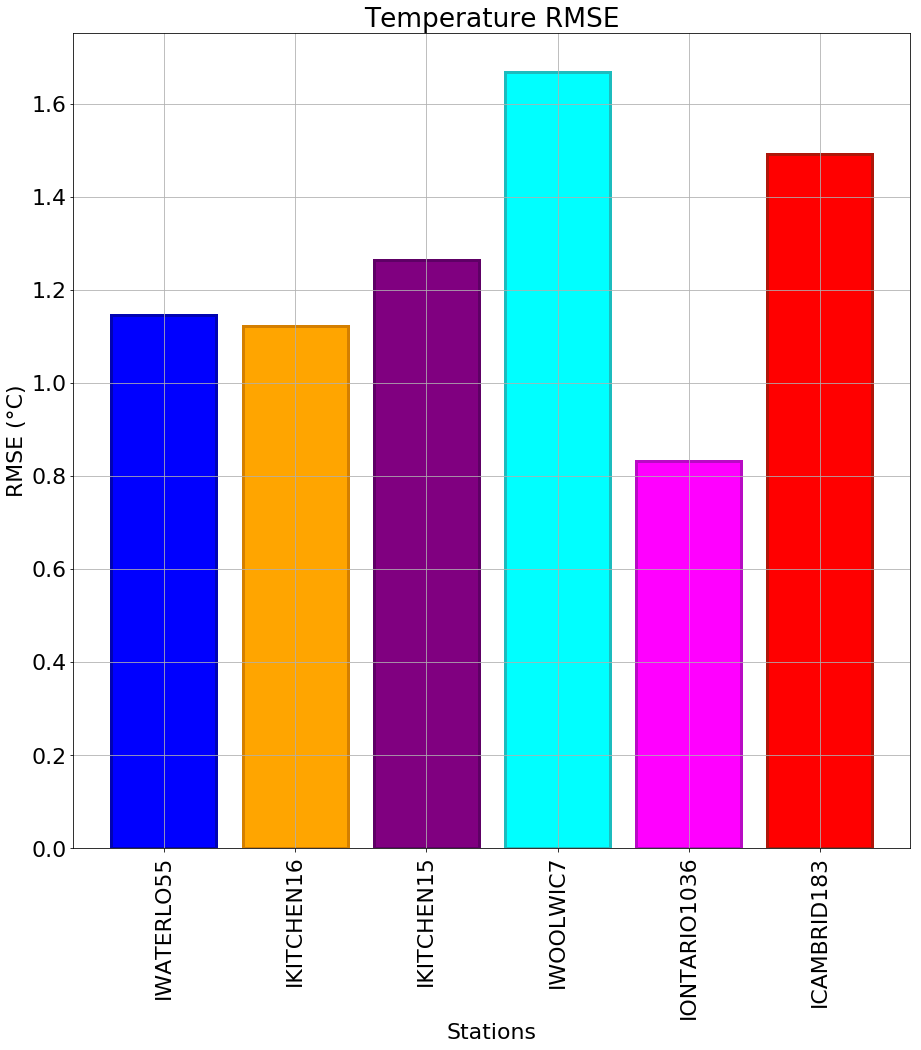

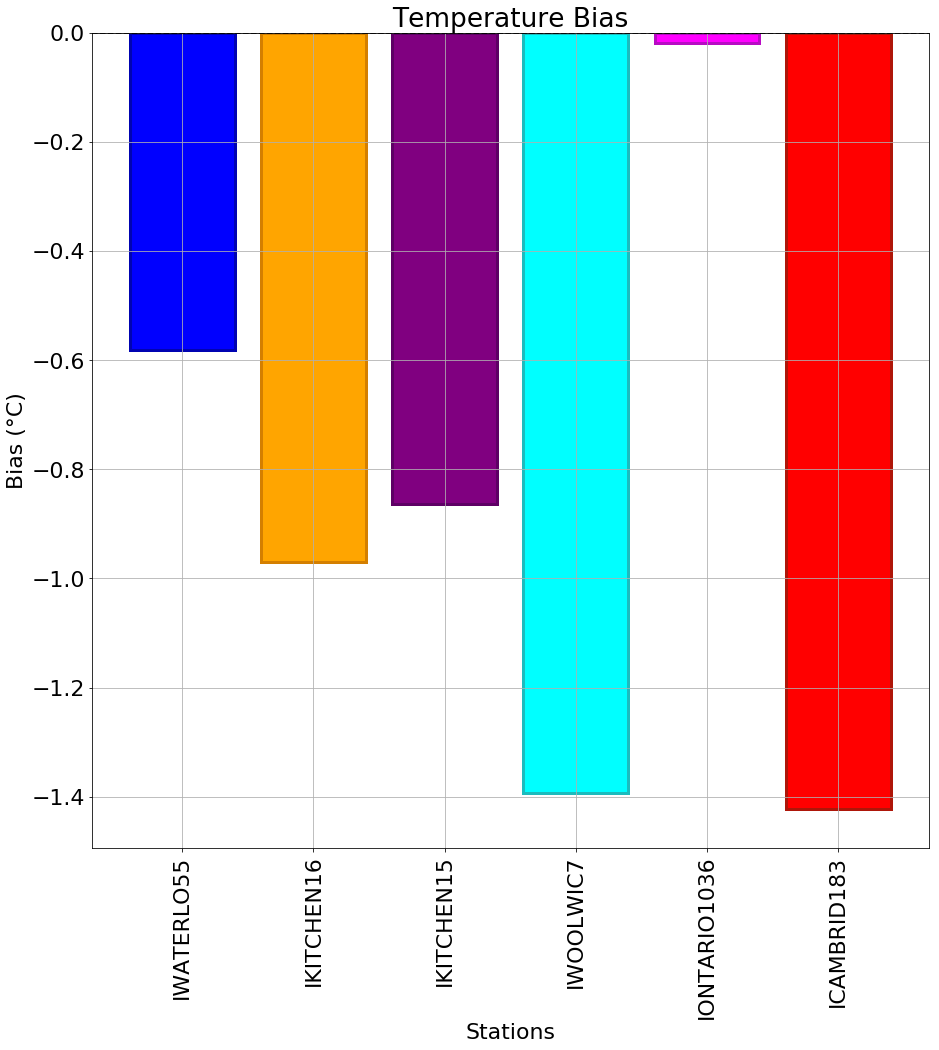

Precipitation Plots:


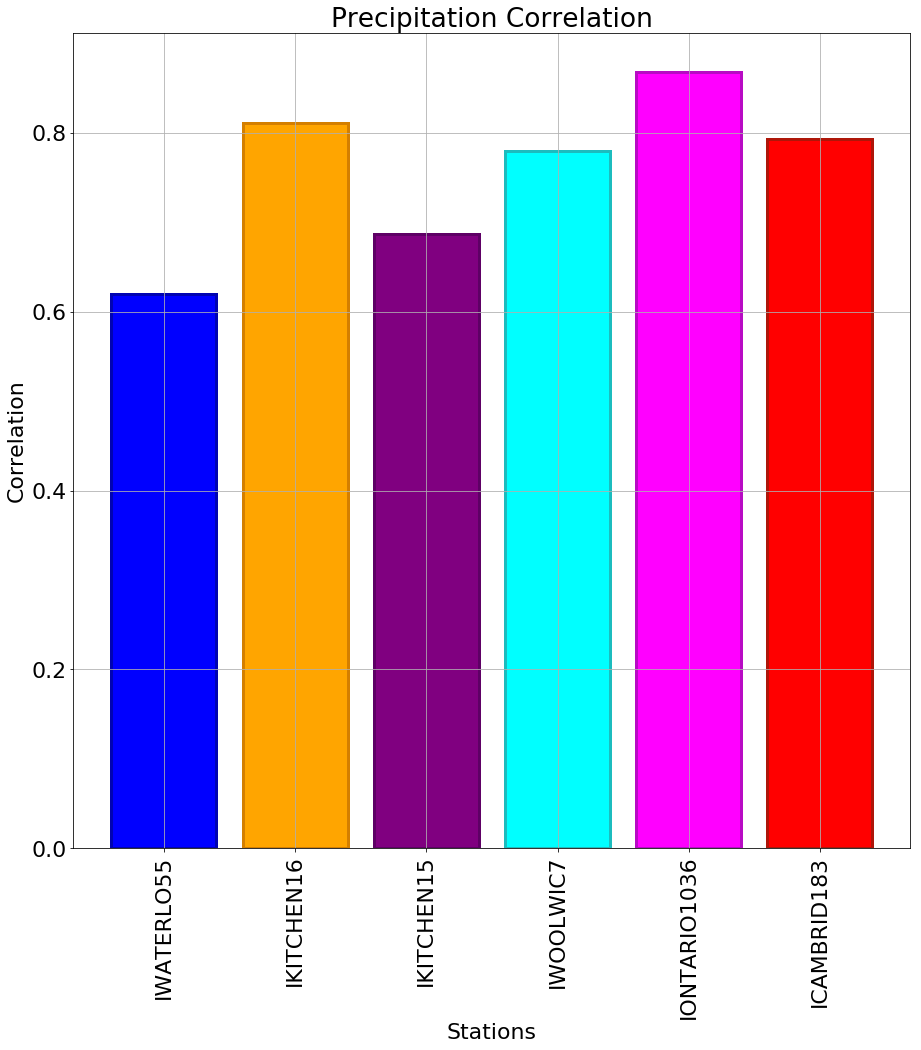

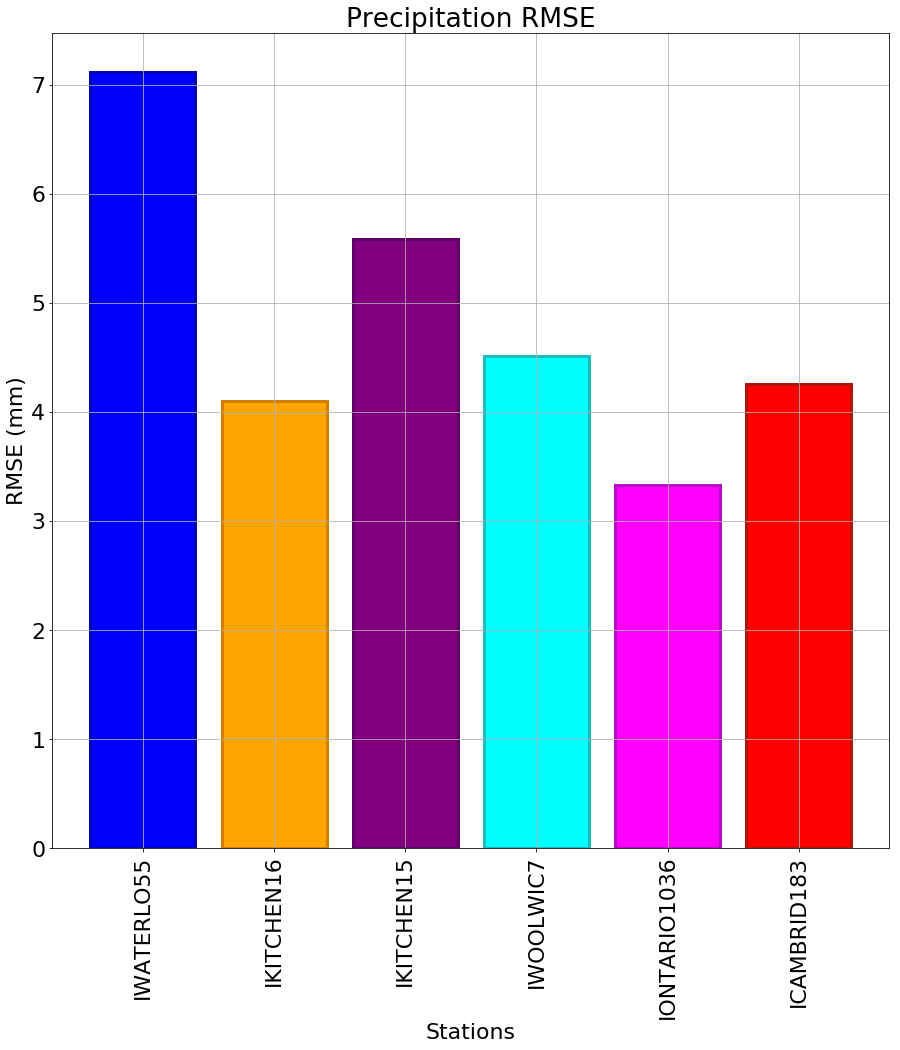

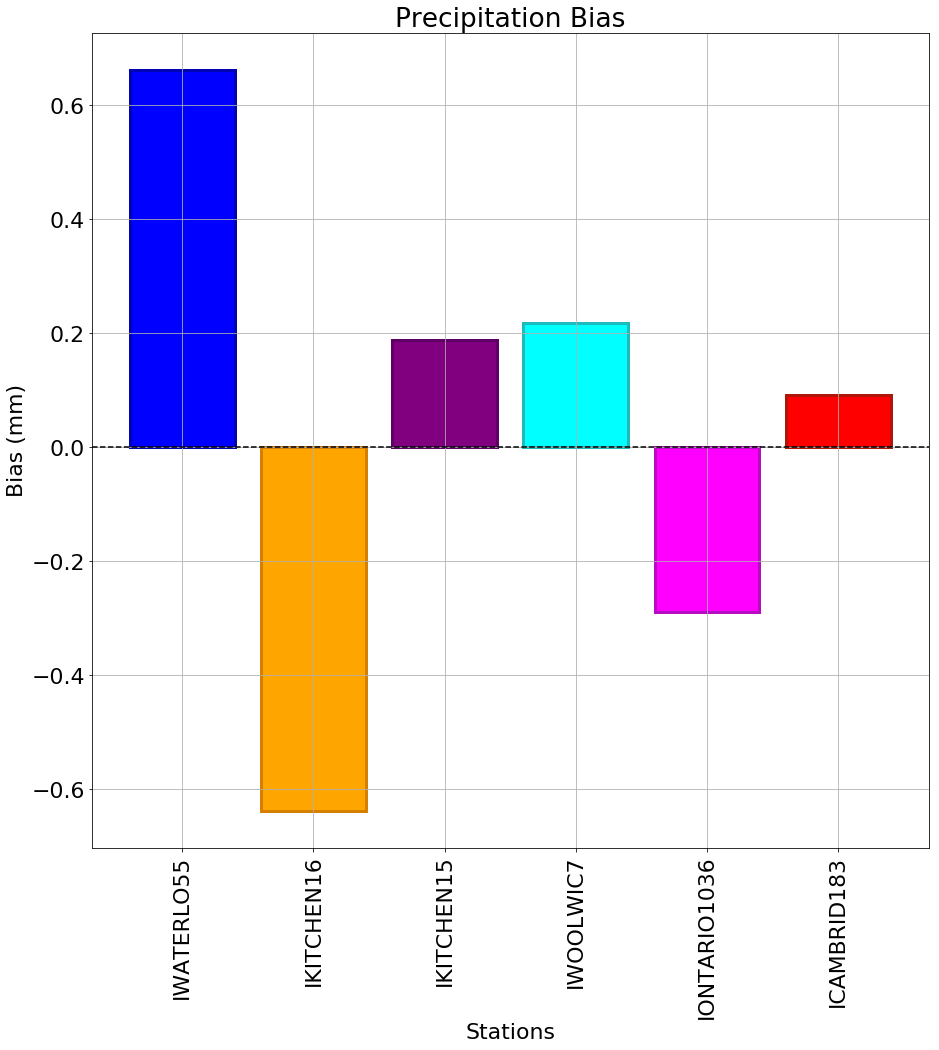

Humidity Plots:


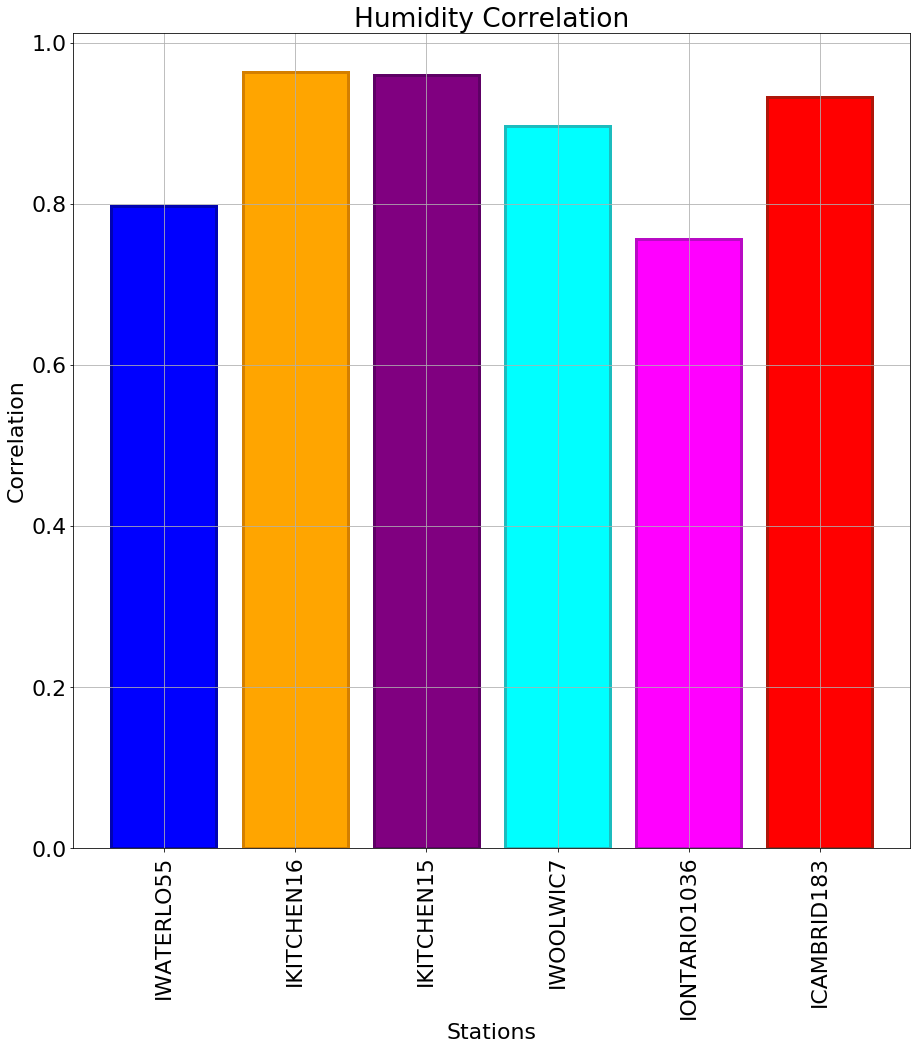

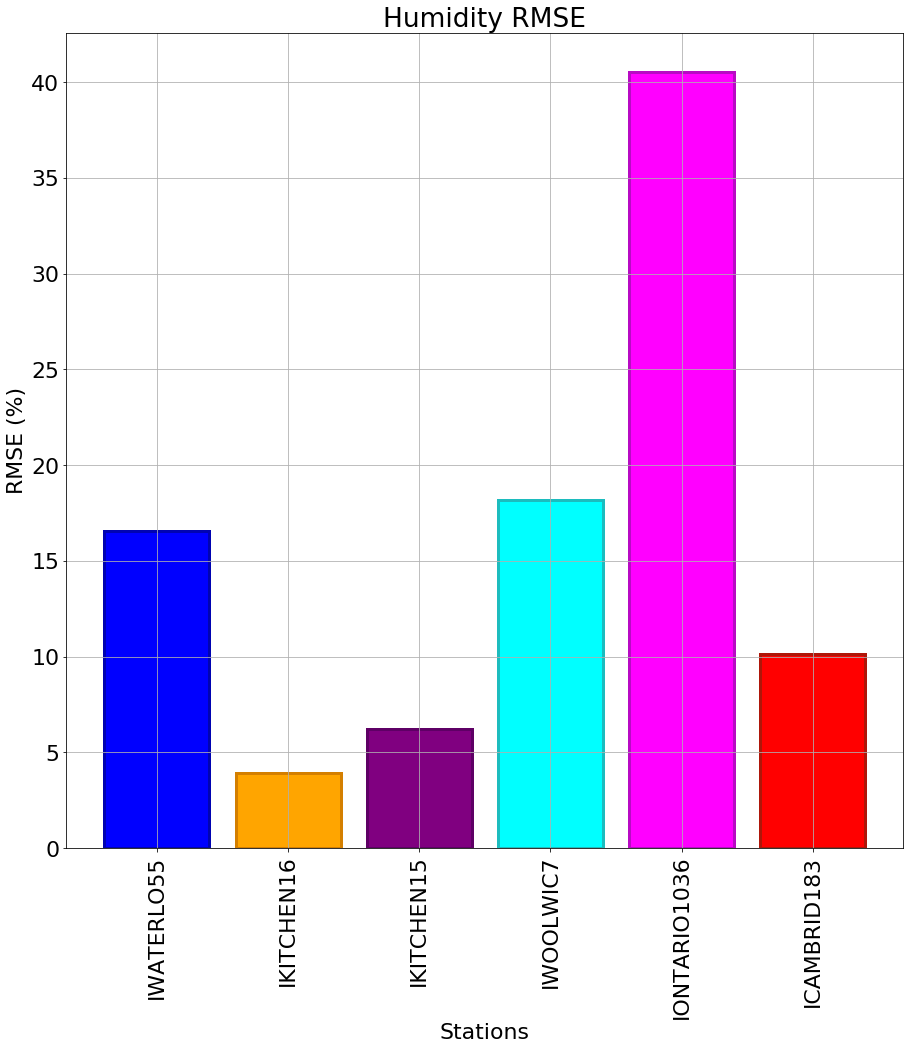

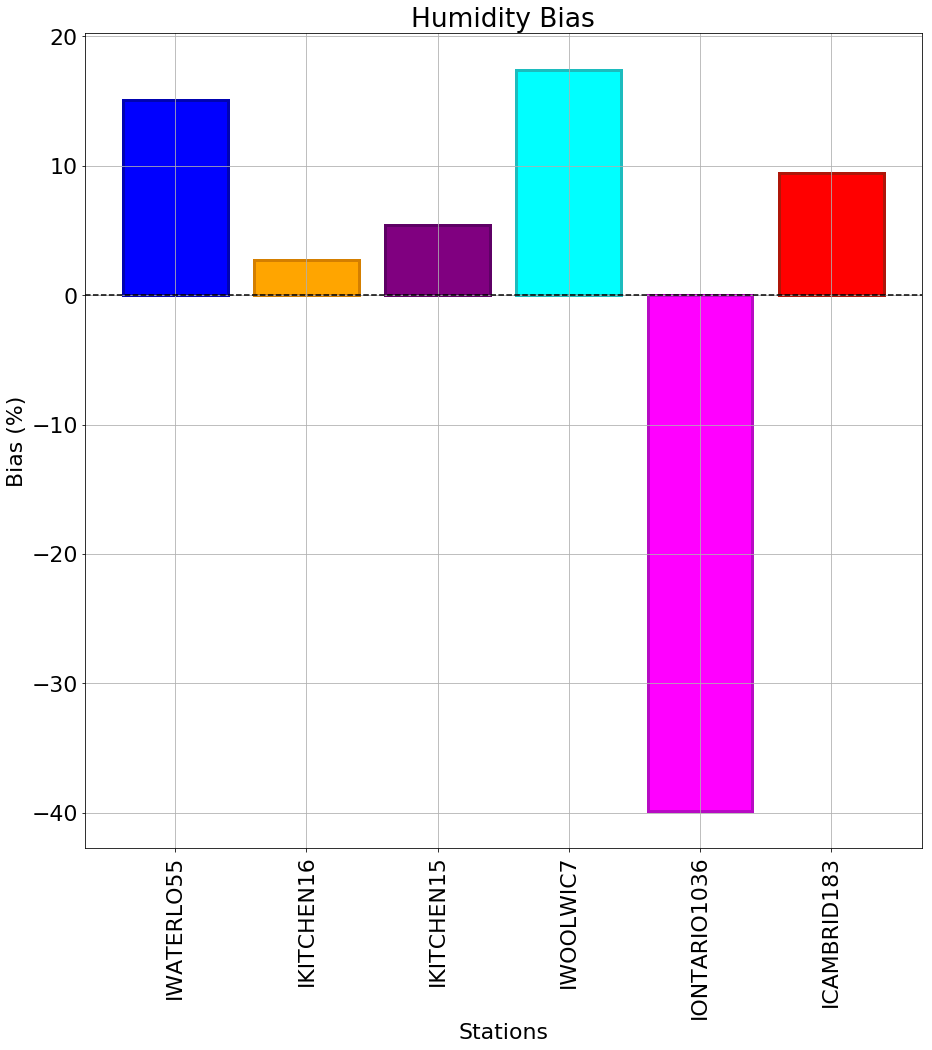

In [6]:
#### Plot statistics bars

station_names = ["IWATERLO55", "IKITCHEN16", "IKITCHEN15", "IWOOLWIC7", "IONTARIO1036", "ICAMBRID183"]
colors = ["blue", "orange", "purple", "cyan", "magenta", "red"]
edgecolors = ["#0003b1", "#d47f00", "#5e0065", "#1cbcbe", "#b80bc4", "#ae1609"]
x_pos = np.arange(len(station_names))

tempAvg_IWATERLO55 = [0.9963924942236674, 1.1459436343846992, -0.5820133544929185]
tempAvg_IKITCHEN16 = [0.9968133924503156, 1.121634751658949, -0.9698674358953872]
tempAvg_IKITCHEN15 = [0.9964652244417639, 1.2646956317122056, -0.8637602179836517]
tempAvg_IWOOLWIC7 = [0.9960570312859838, 1.6685781388548997, -1.393308616607853]
tempAvg_IONTARIO1036 = [0.9971202940177053, 0.8320502943378437, -0.018826541306104616]
tempAvg_ICAMBRID183 = [0.9950966224590866, 1.4911283268554851, -1.423347997503539]

precipTotal_IWATERLO55 = [0.6200847069497297, 7.121453040397964, 0.6624365212444223]
precipTotal_IKITCHEN16 = [0.811248582892887, 4.1047008313586035, -0.6382021143135677]
precipTotal_IKITCHEN15 = [0.6868117997049794, 5.588692554494732, 0.18899182561307848]
precipTotal_IWOOLWIC7 = [0.7797948927342386, 4.511474441836534, 0.21740154256190314]
precipTotal_IONTARIO1036 = [0.8686107620970087, 3.3348943917904816, -0.2885524897445877]
precipTotal_ICAMBRID183 = [0.7933587470262785, 4.257092996649581, 0.09229240558354768]

humidityAvg_IWATERLO55 = [0.7970149805946686, 16.5738440831422, 15.038813366470052]
humidityAvg_IKITCHEN16 = [0.9642104868940181, 3.9263752097055153, 2.6767641253885444]
humidityAvg_IKITCHEN15 = [0.9605859529406755, 6.199455016919792, 5.392370572207085]
humidityAvg_IWOOLWIC7 = [0.8972703883659896, 18.159358333431477, 17.40266672622505]
humidityAvg_IONTARIO1036 = [0.7563334592608332, 40.5547384800693, -39.86228553462885]
humidityAvg_ICAMBRID183 = [0.9329467007767808, 10.126711180319548, 9.470346916718682]

def plotStats(metric_string, units, corr, rmse, bias):
    ### Correlations
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.rcParams.update({'font.size': 22})
    plt.grid()
    plt.bar(x_pos, corr, color=colors, edgecolor=edgecolors, linewidth=3, align='center')
    plt.xticks(x_pos, station_names)
    plt.xlabel('Stations')
    plt.ylabel('Correlation')
    plt.title(metric_string + ' Correlation')
    plt.xticks(rotation=90)
    plt.show()

    ### RMSE
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.rcParams.update({'font.size': 22})
    plt.grid()
    plt.bar(x_pos, rmse, color=colors, edgecolor=edgecolors, linewidth=3, align='center')
    plt.xticks(x_pos, station_names)
    plt.xlabel('Stations')
    plt.ylabel('RMSE ' + units)
    plt.title(metric_string + ' RMSE')
    plt.xticks(rotation=90)
    plt.show()

    ### Bias
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.rcParams.update({'font.size': 22})
    plt.grid()
    plt.bar(x_pos, bias, color=colors, edgecolor=edgecolors, linewidth=3, align='center')
    plt.xticks(x_pos, station_names)
    plt.xlabel('Stations')
    plt.ylabel('Bias ' + units)
    plt.axhline(y=0, color="black", linestyle='--')
    plt.title(metric_string + ' Bias')
    plt.xticks(rotation=90)
    plt.show()
    
### Temperature
print("Temperature Plots:")
temp_corr = [tempAvg_IWATERLO55[0], tempAvg_IKITCHEN16[0], tempAvg_IKITCHEN15[0], tempAvg_IWOOLWIC7[0], tempAvg_IONTARIO1036[0], tempAvg_ICAMBRID183[0]]
temp_rmse = [tempAvg_IWATERLO55[1], tempAvg_IKITCHEN16[1], tempAvg_IKITCHEN15[1], tempAvg_IWOOLWIC7[1], tempAvg_IONTARIO1036[1], tempAvg_ICAMBRID183[1]]
temp_bias = [tempAvg_IWATERLO55[2], tempAvg_IKITCHEN16[2], tempAvg_IKITCHEN15[2], tempAvg_IWOOLWIC7[2], tempAvg_IONTARIO1036[2], tempAvg_ICAMBRID183[2]]
plotStats('Temperature', '(°C)', temp_corr, temp_rmse, temp_bias)

### Precipitation
print("Precipitation Plots:")
precipTotal_corr = [precipTotal_IWATERLO55[0], precipTotal_IKITCHEN16[0], precipTotal_IKITCHEN15[0], precipTotal_IWOOLWIC7[0], precipTotal_IONTARIO1036[0], precipTotal_ICAMBRID183[0]]
precipTotal_rmse = [precipTotal_IWATERLO55[1], precipTotal_IKITCHEN16[1], precipTotal_IKITCHEN15[1], precipTotal_IWOOLWIC7[1], precipTotal_IONTARIO1036[1], precipTotal_ICAMBRID183[1]]
precipTotal_bias = [precipTotal_IWATERLO55[2], precipTotal_IKITCHEN16[2], precipTotal_IKITCHEN15[2], precipTotal_IWOOLWIC7[2], precipTotal_IONTARIO1036[2], precipTotal_ICAMBRID183[2]]
plotStats('Precipitation', '(mm)', precipTotal_corr, precipTotal_rmse, precipTotal_bias)

### Humidity
print("Humidity Plots:")
humidityAvg_corr = [humidityAvg_IWATERLO55[0], humidityAvg_IKITCHEN16[0], humidityAvg_IKITCHEN15[0], humidityAvg_IWOOLWIC7[0], humidityAvg_IONTARIO1036[0], humidityAvg_ICAMBRID183[0]]
humidityAvg_rmse = [humidityAvg_IWATERLO55[1], humidityAvg_IKITCHEN16[1], humidityAvg_IKITCHEN15[1], humidityAvg_IWOOLWIC7[1], humidityAvg_IONTARIO1036[1], humidityAvg_ICAMBRID183[1]]
humidityAvg_bias = [humidityAvg_IWATERLO55[2], humidityAvg_IKITCHEN16[2], humidityAvg_IKITCHEN15[2], humidityAvg_IWOOLWIC7[2], humidityAvg_IONTARIO1036[2], humidityAvg_ICAMBRID183[2]]
plotStats('Humidity', '(%)', humidityAvg_corr, humidityAvg_rmse, humidityAvg_bias)

